## Importing libraries

In [4]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
%matplotlib inline

### reading the customers csv file and then get and replacing male & female in gender column by 1 & 0

In [5]:
cust_df = pd.read_csv('E:\Term 6\CIS\Project 1\Customers.csv')
cust_df.head(10)
cust_df['Gender'] = cust_df['Gender'].map({'Male': 1, 'Female': 0})

In [6]:
cust_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### in this part, we want to find customers with max & min Age

In [7]:
age_li=[18, 70]
cust_df[cust_df['Age'].isin(age_li)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
33,34,1,18,33,92
60,61,1,70,46,56
65,66,1,18,48,59
70,71,1,70,49,55
91,92,1,18,59,41
114,115,0,18,65,48


### in this part, we want to find customers with max & min Annual Income

In [8]:
income_li=[137, 15]
cust_df[cust_df['Annual Income (k$)'].isin(income_li)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
198,199,1,32,137,18
199,200,1,30,137,83


### in this part, we want to find customers with max & min Spending Score 

In [9]:
score_li=[1, 99]
cust_df[cust_df['Spending Score (1-100)'].isin(score_li)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,0,35,19,99
156,157,1,37,78,1
158,159,1,34,78,1


### define variables that we want to cluster according them and standardize

In [10]:
X = cust_df.values[:, 1:]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

### Apply k-means on our dataset

In [11]:
clusterNum = 3
kmeanModel = KMeans(n_clusters= clusterNum)
kmeanModel.fit(X)
labels = kmeanModel.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


### Add clusters column to our dataset and print top 5 rows

In [12]:
cust_df["Clus_km"] = labels
cust_df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


### calculating mean of variables according to ClusterNumber

In [13]:
cust_df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,62.0,0.406504,40.325203,44.154472,49.829268
1,162.0,0.526316,40.394737,87.000000,18.631579
2,162.0,0.461538,32.692308,86.538462,82.128205


### calculating max of variables according to ClusterNumber

In [14]:
cust_df.groupby('Clus_km').max()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,123,1,70,69,99
1,199,1,59,137,40
2,200,1,40,137,97


### calculating min of variables according to ClusterNumber

In [15]:
cust_df.groupby('Clus_km').min()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,1,0,18,15,3
1,125,0,19,70,1
2,124,0,27,69,63


### 'Annual Income (k dollars) - Age' plot, size of points shows 'spending score'

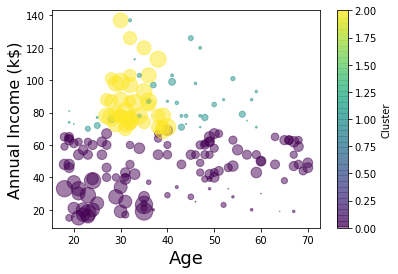

In [16]:
area = np.pi * ( X[:, 3] / 10)**2  
plt.scatter(X[:, 1], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.colorbar(label="Cluster", orientation="vertical")
plt.show()

### 'Spending Score (1-100) - Age' plot - size of points shows 'annual income'

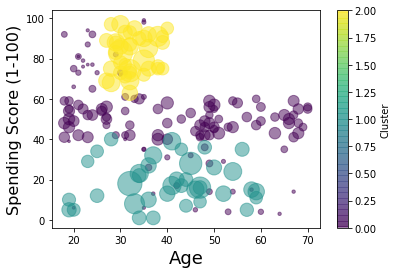

In [17]:
area = np.pi * ( X[:, 2] / 10)**2  
plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)
plt.colorbar(label="Cluster", orientation="vertical")
plt.show()

### 'Spending Score (1-100) - Annual Income (k dollars)' plot - size of points shows 'Age'

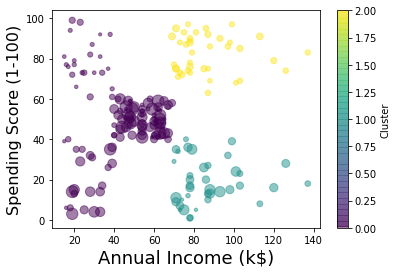

In [18]:
area = np.pi * ( X[:, 1] / 10)**2  
plt.scatter(X[:, 2], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)
plt.colorbar(label="Cluster", orientation="vertical")
plt.show()

### A 3D chart of three variables age, annual income and spending score

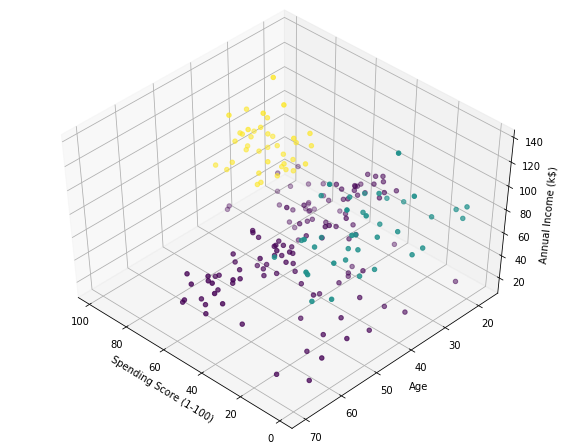

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Spending Score (1-100)', fontsize=16)
# plt.zlabel('Annual Income (k$)', fontsize=16)
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income (k$)')
ax.scatter(X[:, 3], X[:, 1], X[:, 2], c= labels.astype(np.float))

### applying the elbow method for finding optimum k

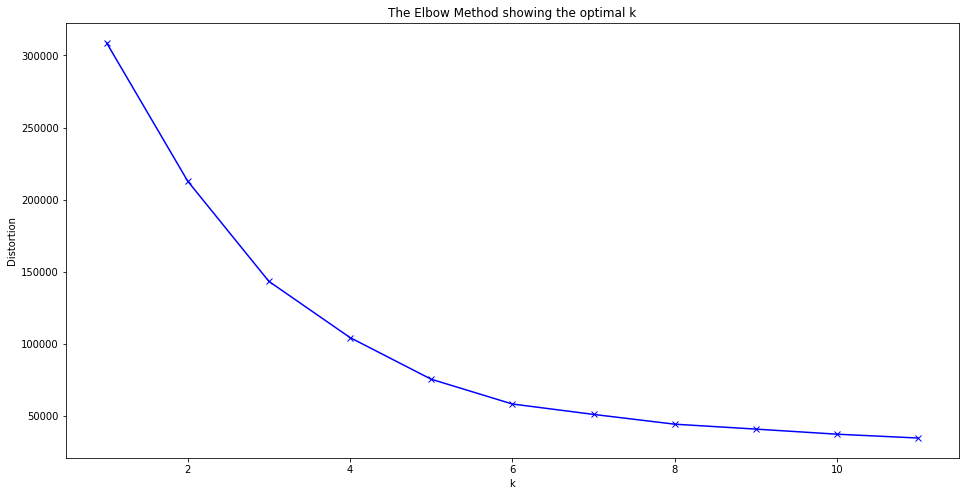

In [21]:
#optimize K
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()